# Compare PHY data to converted PHY_2_NWB   
This is the new version of code that will first write out the code to the simple tsv files that will be used by for analysis. This will be a replacement of the mat files.   

__Format:__
- TSV file will be two columns. First column the spike time in seconds. Second column is the cluster number.
- Note that there may be many more spikes in the PHY datafile. This file will only take spikes from clusters that have been deemed good.
- Second TSV file that correlates the cluster ID with the recording electrode ID. First column is the cluster number. Second column is recording electrode with the highest amplitude for that spike.
- GZIP files will write out faster because fewer calls to disk. However, likely not important with these smaller data types. I can put a flag to optionally write out to gzip compression. Gzip files can be use too input to R-studio.


## Command Line Example

```zsh
python meap/meappy/phy_2_nwb.py /Users/walter/Desktop/EM1_VTA_PHY_for_conversion/20211109_15h09m07s.modat.GUI
```

## Read PHY data

In [1]:
%pwd

'/Users/walter/Src/meap/meappy/meappy'

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import med64_data as me
from phy_2_nwb import *
from waveform import Fs

## Usage  
Conversion code for PHY files to NWB file formats  
This script reads in a PHY formatted data directory of SpykingCircus spike sorter output.   

In this notebook, change the filepaths in the next cell to the filepaths for your computer.  

Usage in command line: type 'python phy_2_nwb.py <phy_data_directory>' 

In [3]:
# provide PHY data directory
phy_dir = '/Users/walter/Desktop/EM1_VTA_PHY_for_conversion/20211109_15h09m07s.modat.GUI'
med64_bin_path = '/Users/walter/Data/latest_modat/20211105_15h48m31s.modat.bin'

print(f'PHY data directory name is \n\t{phy_dir}')
print(f'Raw modat data filename is \n\t{med64_bin_path}')

# output files
clust_chan_filepath = "/Users/walter/Desktop/phy2nwb_output/unit_chan.tsv"
spiketime_clust_filepath = "/Users/walter/Desktop/phy2nwb_output/spike_ts_unit.tsv"

PHY data directory name is 
	/Users/walter/Desktop/EM1_VTA_PHY_for_conversion/20211109_15h09m07s.modat.GUI
Raw modat data filename is 
	/Users/walter/Data/latest_modat/20211105_15h48m31s.modat.bin


In [4]:
spiketime_clust, clust_chan = extract_phy_data(phy_dir)

# write array from PHY
write_int_array_to_tsv(clust_chan_filepath, clust_chan)
write_float_int_array_to_tsv(spiketime_clust_filepath, spiketime_clust)


Data written to /Users/walter/Desktop/phy2nwb_output/unit_chan.tsv
Data written to /Users/walter/Desktop/phy2nwb_output/spike_ts_unit.tsv


In [5]:
# load array from just written  PHY and display data
clust_chan_new = load_int_arr(clust_chan_filepath)
spiketimes_new, clust_ids_new = load_spiketime_clust_arr(spiketime_clust_filepath)

print(clust_chan_new)
print(spiketimes_new.shape)
print(spiketimes_new[:10])
print(clust_ids_new[:10])

[[13  5]
 [16 29]
 [32 15]
 [34 20]]
(29668,)
[ 0.7755   3.8271   8.3067   9.7938  11.33185 25.6511  28.3087  31.1579
 31.1601  31.167  ]
[34 34 34 34 34 34 34 34 34 34]


## Display the firing rate over time
Each histogram is firing rate over session time for a unit

[13, 16, 32, 34]


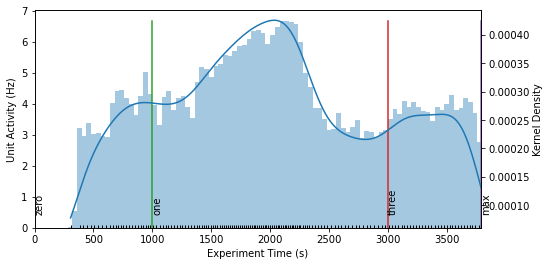

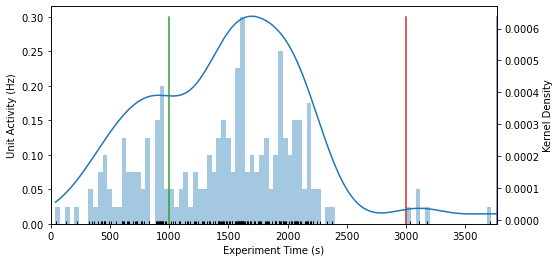

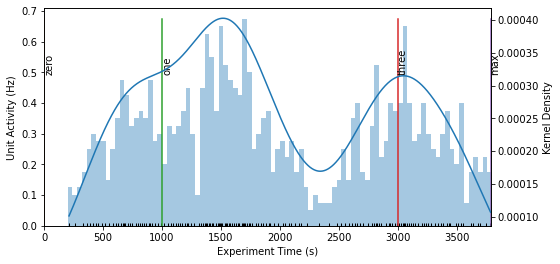

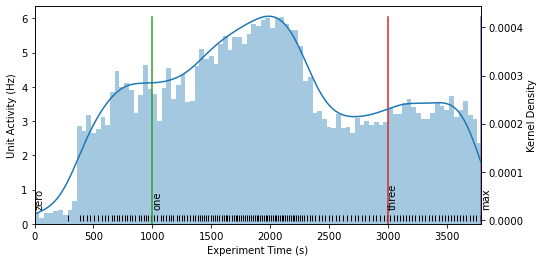

In [6]:
bin_sec = 40
clusts = [clust for clust, chan in clust_chan_new]
print(clusts)

for i in clusts:
    clust_index = np.where(clust_ids_new == i)
    spike_times = spiketimes_new[clust_index]
    
    tx_times = {'zero': 0, 'one':1000, 'three':3000, 'max':max(spike_times)}
    me.plot_expt_histo(spike_times, tx_times, bin_sec)